<a href="https://colab.research.google.com/github/Poorneshsharma12/Machine-Learning-Visualization-model/blob/main/Development_of_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Preprocessing**

In [ ]:
# Step 1: Preprocessing

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming you have uploaded Malnutrition_data.csv to Colab)
# If you haven't uploaded it yet, click the folder icon on the left, and upload the file
data = pd.read_csv('/content/Malnutrition data.csv')

# Display the first few rows to understand the data
print("Initial Dataset:")
print(data.head())

# Handle missing values using SimpleImputer (replacing NaN with the mean for numerical columns)
# Select numerical columns for imputation
numerical_cols = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight', 'U5 Population (\'000s)']
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Encode the categorical variable 'Income Classification' using LabelEncoder
label_encoder = LabelEncoder()
data['Income Classification'] = label_encoder.fit_transform(data['Income Classification'])

# Drop the 'Country' column as it won't be used directly in the LSTM model (we'll use it later for Tableau)
data_processed = data.drop(columns=['Country'])

# Feature scaling for numerical columns (LSTM models perform better with scaled data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_processed)

# Convert back to DataFrame for easier handling
data_scaled = pd.DataFrame(scaled_data, columns=data_processed.columns)

# Display the preprocessed data
print("\nPreprocessed Dataset (Scaled and Encoded):")
print(data_scaled.head())

# Prepare data for LSTM: Reshape the data into sequences
# We'll create sequences of length 3 for each sample (this is a simple example; adjust based on your needs)
sequence_length = 3
X, y = [], []

# Create sequences for LSTM input (using all features to predict 'Stunting' as an example target)
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled.iloc[i:i + sequence_length].values)  # Sequence of features
    y.append(data_scaled.iloc[i + sequence_length]['Stunting'])  # Target (next Stunting value)

X = np.array(X)
y = np.array(y)

# Display the shapes of the sequences
print("\nShape of X (sequences for LSTM):", X.shape)  # (samples, timesteps, features)
print("Shape of y (target):", y.shape)

Initial Dataset:
       Country  Income Classification  Severe Wasting    Wasting  Overweight  \
0  AFGHANISTAN                      0        3.033333  10.350000    5.125000   
1      ALBANIA                      2        4.075000   7.760000   20.800000   
2      ALGERIA                      2        2.733333   5.942857   12.833333   
3       ANGOLA                      1        2.400000   6.933333    2.550000   
4    ARGENTINA                      2        0.200000   2.150000   11.125000   

    Stunting  Underweight  U5 Population ('000s)  
0  47.775000    30.375000            4918.561500  
1  24.160000     7.700000             232.859800  
2  19.571429     7.342857            3565.213143  
3  42.633333    23.600000            3980.054000  
4  10.025000     2.600000            3613.651750  

Preprocessed Dataset (Scaled and Encoded):
   Income Classification  Severe Wasting   Wasting  Overweight  Stunting  \
0              -1.481203        0.529109  0.845281   -0.452667  1.505173   


In [ ]:
# Step 2: Splitting into Train and Test Set (70:30 ratio)

# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)  # (samples, timesteps, features)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Verify the split ratio
train_ratio = len(X_train) / (len(X_train) + len(X_test))
print(f"\nTrain set ratio: {train_ratio:.2f} (should be ~0.70)")

Shape of X_train: (104, 3, 7)
Shape of X_test: (45, 3, 7)
Shape of y_train: (104,)
Shape of y_test: (45,)

Train set ratio: 0.70 (should be ~0.70)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - loss: 0.9900 - val_loss: 0.9843
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0478 - val_loss: 0.9858
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0028 - val_loss: 0.9866
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.9814 - val_loss: 0.9867
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.0536 - val_loss: 0.9884
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9440 - val_loss: 0.9891
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.9934 - val_loss: 0.9887
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.0610 - val_loss: 0.9869
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9759 - val_loss: 0.9874
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9538 - val_loss: 0.9875
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9688 - val_loss: 0.9844
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8842 - val_loss: 0.9833


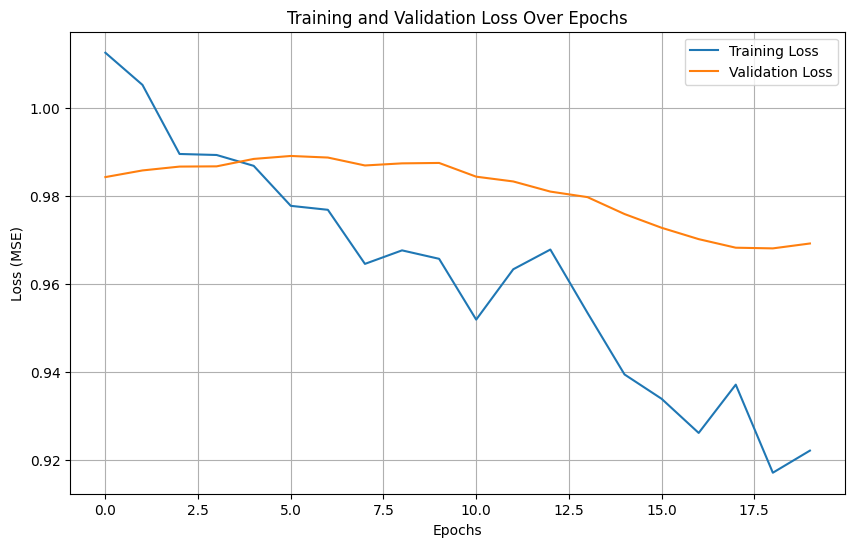

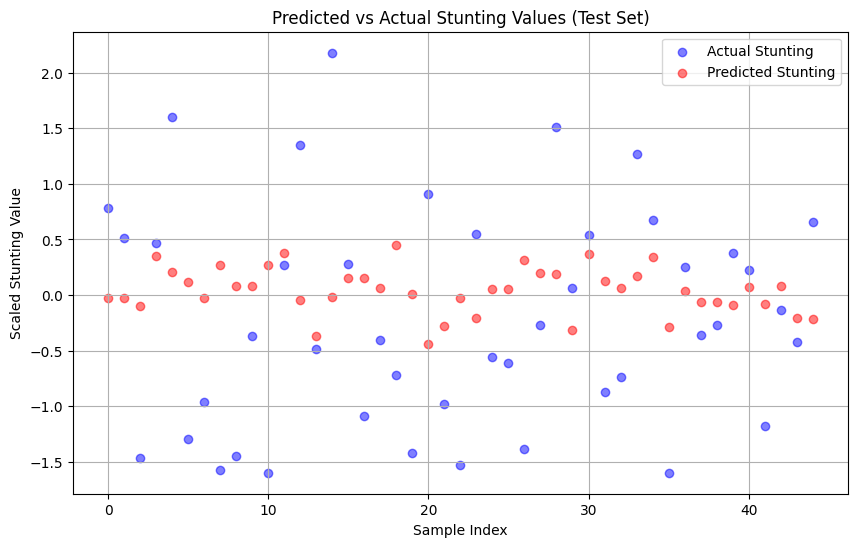

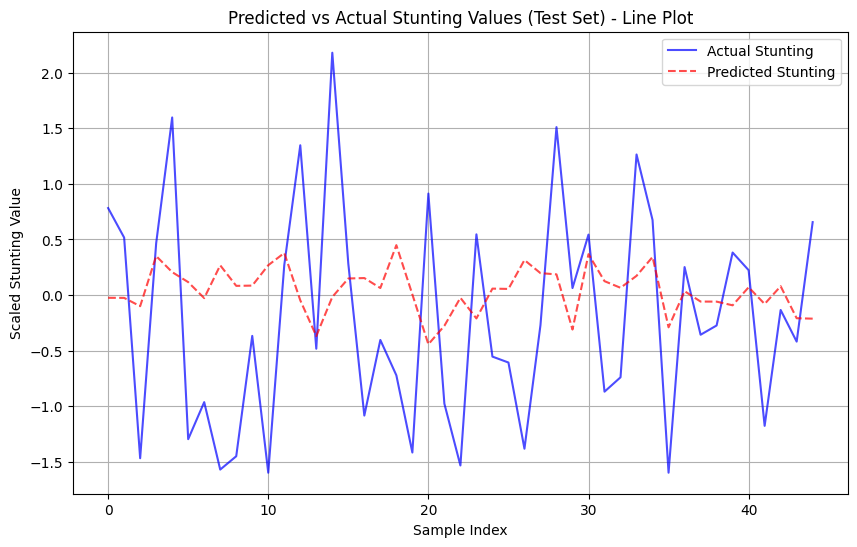

In [ ]:
# Step 3: Model Evaluation Metrics and Training (LSTM) with Predicted vs Actual Plot

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer for predicting Stunting

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Stunting', color='blue', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Stunting', color='red', alpha=0.5)
plt.title('Predicted vs Actual Stunting Values (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Stunting Value')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot Predicted vs Actual as a line plot for better comparison
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stunting', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Stunting', color='red', alpha=0.7, linestyle='--')
plt.title('Predicted vs Actual Stunting Values (Test Set) - Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Stunting Value')
plt.legend()
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Computing importance for feature: Income Classification
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Computing importance for feature: Severe Wasting
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Computing importance for feature: Wasting
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━

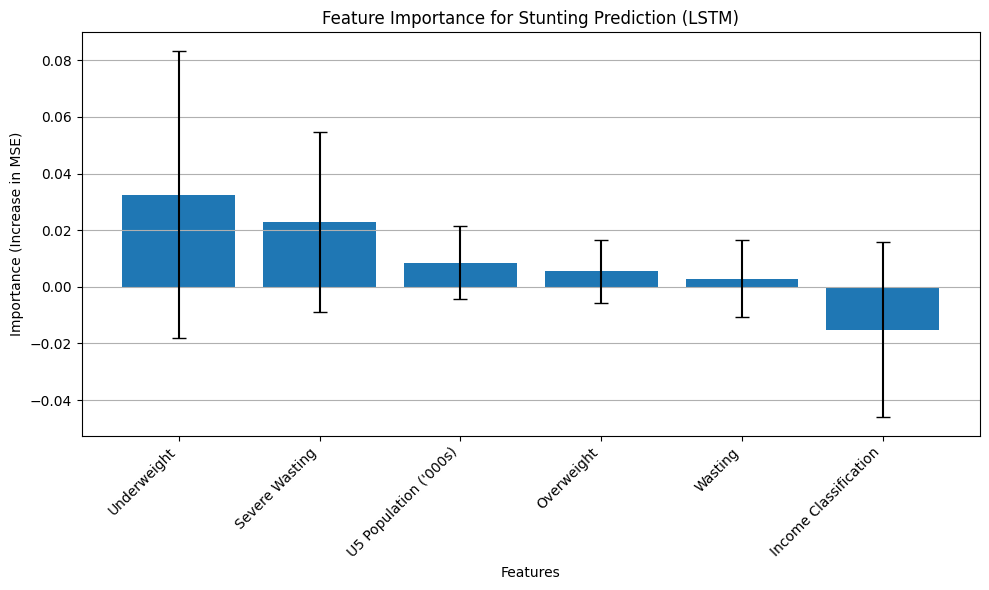

In [ ]:
# Step 4: Feature Analysis Using LSTM

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure the model is trained (from Step 3)
# Note: This assumes the model from Step 3 is still available; if not, re-run the model training part from Step 3

# Custom permutation importance function for 3D LSTM input
def custom_permutation_importance(model, X_test, y_test, feature_names, n_repeats=10):
    # Baseline MSE with unpermuted data
    y_pred = model.predict(X_test)
    baseline_mse = mean_squared_error(y_test, y_pred)

    # Initialize arrays to store importance scores
    importances = np.zeros((len(feature_names), n_repeats))

    # Iterate over each feature
    for feature_idx, feature_name in enumerate(feature_names):
        print(f"Computing importance for feature: {feature_name}")
        # Create a copy of X_test to permute
        X_permuted = X_test.copy()

        # Permute the feature across all timesteps
        for repeat in range(n_repeats):
            # Shuffle the values of the current feature across all timesteps
            permuted_feature = X_permuted[:, :, feature_idx].flatten()
            np.random.shuffle(permuted_feature)
            X_permuted[:, :, feature_idx] = permuted_feature.reshape(X_test.shape[0], X_test.shape[1])

            # Make predictions with permuted data
            y_pred_permuted = model.predict(X_permuted)
            mse = mean_squared_error(y_test, y_pred_permuted)
            importances[feature_idx, repeat] = mse - baseline_mse

    # Calculate mean and std of importance scores
    importance_mean = np.mean(importances, axis=1)
    importance_std = np.std(importances, axis=1)

    return importance_mean, importance_std

# Get feature names (excluding the target 'Stunting')
feature_names = data_processed.drop(columns=['Stunting']).columns

# Compute custom permutation importance
importance_mean, importance_std = custom_permutation_importance(model, X_test, y_test, feature_names, n_repeats=10)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_mean,
    'Std': importance_std
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance Analysis:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], yerr=feature_importance_df['Std'], capsize=5)
plt.title('Feature Importance for Stunting Prediction (LSTM)')
plt.xlabel('Features')
plt.ylabel('Importance (Increase in MSE)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Exporting ML Output for Tableau (Revised)

# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Recreate sequences for the entire dataset to get predictions for all countries
# We need to reapply the sequence creation from Step 1, but for the entire dataset
sequence_length = 3  # Same as in Step 1
X_all, y_all = [], []

# Create sequences for the entire dataset
for i in range(len(data_scaled) - sequence_length):
    X_all.append(data_scaled.iloc[i:i + sequence_length].values)  # Sequence of features
    y_all.append(data_scaled.iloc[i + sequence_length]['Stunting'])  # Target (next Stunting value)

X_all = np.array(X_all)
y_all = np.array(y_all)

# Step 2: Make predictions for all sequences using the trained model
# Note: Ensure the model from Step 3 is still available
y_pred_all = model.predict(X_all)

# Step 3: Inverse transform the actual and predicted Stunting values to their original scale
# Create a dummy array with the same shape as the scaled data
stunting_index = data_processed.columns.get_loc('Stunting')  # Get the index of Stunting column
dummy_array = np.zeros((len(y_all), len(data_processed.columns)))  # Create a zero array
dummy_array[:, stunting_index] = y_all  # Fill the Stunting column with actual values
y_all_original = scaler.inverse_transform(dummy_array)[:, stunting_index]  # Inverse transform

# Do the same for predicted values
dummy_array[:, stunting_index] = y_pred_all.flatten()  # Fill with predicted values
y_pred_all_original = scaler.inverse_transform(dummy_array)[:, stunting_index]  # Inverse transform

# Step 4: Reconstruct the original features for all sequences
# Since X_all is 3D (samples, timesteps, features), we'll average over timesteps to get a 2D array
X_all_2d = np.mean(X_all, axis=1)  # Average over timesteps to get (samples, features)
# Inverse transform the scaled features back to their original scale
X_all_original = scaler.inverse_transform(X_all_2d)  # Inverse transform to original scale

# Create a DataFrame with the original features
feature_names = data_processed.columns  # All columns including Stunting (we'll drop Stunting later)
X_all_df = pd.DataFrame(X_all_original, columns=feature_names)

# Step 5: Add the Country column back
# Adjust indices to account for sequence_length
all_indices = np.arange(len(X_all)) + sequence_length  # Indices for all sequences
countries = data['Country'].iloc[all_indices].values  # Get the corresponding countries

# Step 6: Combine actual, predicted, and original features into a single DataFrame
output_df = pd.DataFrame({
    'Country': countries,
    'Actual_Stunting': y_all_original,
    'Predicted_Stunting': y_pred_all_original
})

# Add the original features (excluding Stunting, which is already in Actual/Predicted columns)
features_to_include = [col for col in feature_names if col != 'Stunting']
output_df[features_to_include] = X_all_df[features_to_include]

# Step 7: Export the DataFrame to a CSV file for Tableau
output_df.to_csv('malnutrition_predictions_for_tableau.csv', index=False)
print(f"Data exported to 'malnutrition_predictions_for_tableau.csv' with {len(output_df)} countries for Tableau visualization.")

# Display the first few rows of the output DataFrame
print("\nSample of the exported data:")
print(output_df.head())

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Data exported to 'malnutrition_predictions_for_tableau.csv' with 149 countries for Tableau visualization.

Sample of the exported data:
      Country  Actual_Stunting  Predicted_Stunting  Income Classification  \
0      ANGOLA        42.633333           23.913378               1.333333   
1   ARGENTINA        10.025000           22.844722               1.666667   
2     ARMENIA        16.120000           25.054338               1.666667   
3   AUSTRALIA         1.000000           26.774140               1.666667   
4  AZERBAIJAN        21.816667           24.946459               2.333333   

   Severe Wasting   Wasting  Overweight  Underweight  U5 Population ('000s)  
0        3.280556  8.017619   12.919444    15.139286            2905.544814  
1        3.069444  6.878730   12.061111    12.880952            2592.708981  
2        1.777778  5.008730    8.836111    11.180952            3719.639631  
3        1.400000  4.341111    9.098333     9.89333